# Data Analysis Case study

## Overview

1. **Data Loading & Overview** 
2. **Extensive EDA** 
3. **Data Preparation**
4. **Baseline Random Forest**
5. **Feature Selection** 
6. **Hyperparameter Tuning** 



## Part 1: Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [3]:
# Load data
df = pd.read_csv("attrition.csv")

In [4]:
# Quick overview
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# More overview
print("Shape of dataset (rows, columns):", df.shape)

print("\nColumn info:")
print(df.info())

Shape of dataset (rows, columns): (1470, 35)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement     

## df.info() shows the various data type of the columns present
- Object data type = 9 (including 3 Boolean)
- Numerical data type = 26

In [6]:
# Quick statistical overview

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# A quick statistical analysis of the dataset.
## This considers only the numerical columns in the datasets
- The output shows different statiscal measures of the numerical columns in the dataset
- The average Age of the dataset is 36.9 years, approximately 37 years old with minimum data point at 18years and maxmum is 60years.
- On the average, employees are paid £65.89/hour and the highest earners earns £100/hour.
- ON average, employee spends 7 years at the company while the longest serving employee has spent 40years.
- he employee with the longest years in their current role has spent 18years in that role and on the average, employees are promoted every 2 years. 
- Featuring engineering of number of hours each employee works per day, maybe it would be useful in the prediction model

An extensive breakdown will be found in the Readme file

In [7]:
df["Gender"].value_counts(normalize=True)*100

Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64

In [8]:
# Singular analysis of the Age column for immediate feature engineering
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

<Axes: >

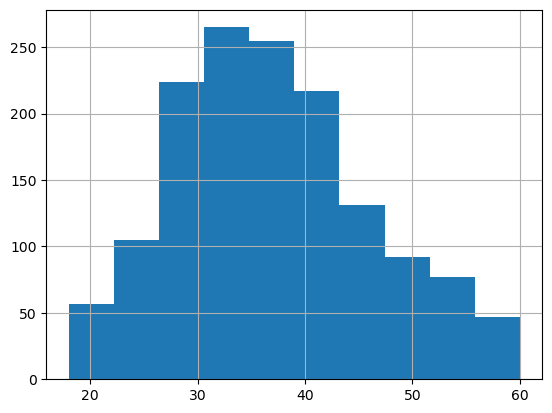

In [9]:
df['Age'].hist()

## Part 2: Extensive EDA

### 2.1 Target Variable Distribution

In [10]:
# Target distribution
df['Attrition'].value_counts(normalize=True) * 100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

##### Class imbalance, only 16% of the employee are at risk of leaving.

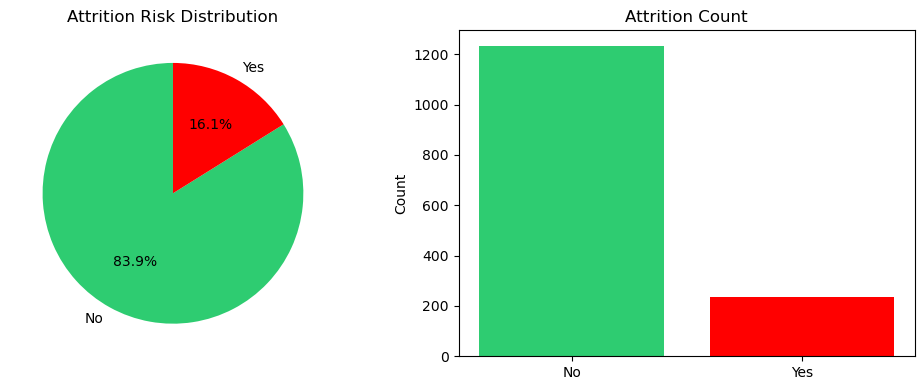

In [ ]:
# Visualise target
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

Risk_counts = df['Attrition'].value_counts()

# Pie chart
colors = ['#2ecc71', '#FF0000']
axes[0].pie(Risk_counts, labels=['No','Yes'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Attrition Risk Distribution')

# Bar chart
axes[1].bar(['No','Yes'], Risk_counts, color=colors)
axes[1].set_ylabel('Count')
axes[1].set_title('Attrition Count')

plt.tight_layout()
plt.savefig('attrition_distribution.png')
plt.show()

<Axes: >

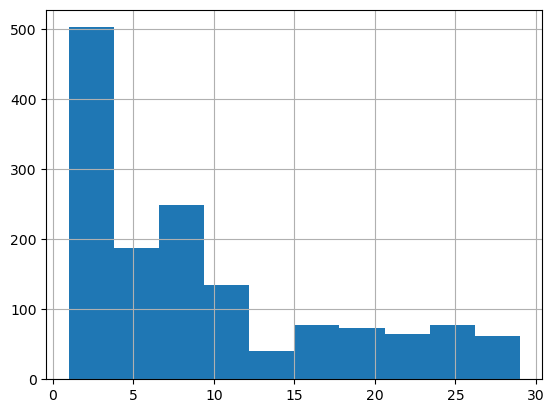

In [13]:
df['DistanceFromHome'].hist()

## Insight
### left skew distribution with majority of our employee leaving closer than the average of 9miles

#### 1.1 Business Travel Analysis

In [15]:
df1 = df.loc[df['BusinessTravel'] == 'Travel_Frequently', ['Age', 'Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'JobSatisfaction',
                                                          'MaritalStatus', 'PerformanceRating']]

df1.head()

,Age,Attrition,BusinessTravel,Department,Gender,JobRole,JobSatisfaction,MaritalStatus,PerformanceRating
1,49,No,Travel_Frequently,Research & Development,Male,Research Scientist,2,Married,4
3,33,No,Travel_Frequently,Research & Development,Female,Research Scientist,3,Married,3
5,32,No,Travel_Frequently,Research & Development,Male,Laboratory Technician,4,Single,3
8,38,No,Travel_Frequently,Research & Development,Male,Manufacturing Director,3,Single,4
26,32,Yes,Travel_Frequently,Research & Development,Female,Research Scientist,1,Single,4


In [16]:
df1['Department'].value_counts()

Department
Research & Development    182
Sales                      84
Human Resources            11
Name: count, dtype: int64

### Insight
- Research and Development department travelled the most of our employees

In [17]:
df1['JobRole'].value_counts()

JobRole
Sales Executive              59
Research Scientist           54
Laboratory Technician        51
Manufacturing Director       29
Healthcare Representative    26
Sales Representative         23
Manager                      13
Research Director            12
Human Resources              10
Name: count, dtype: int64

<Axes: xlabel='Department'>

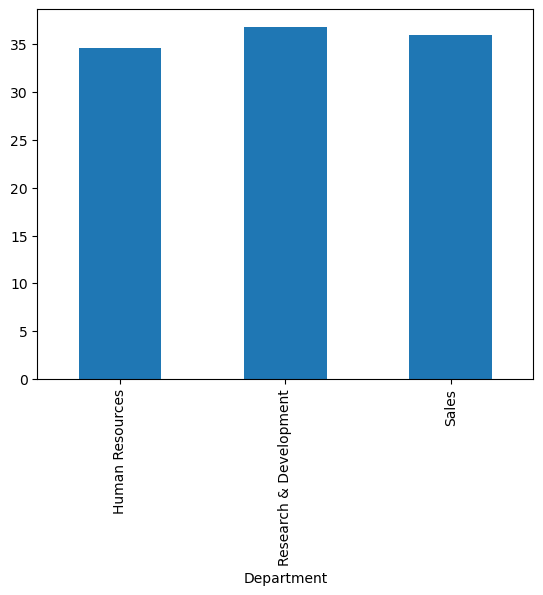

In [31]:
Combo = df1.groupby('Department')['Age'].agg('mean')
Combo.plot(kind='bar')

<Axes: xlabel='Department'>

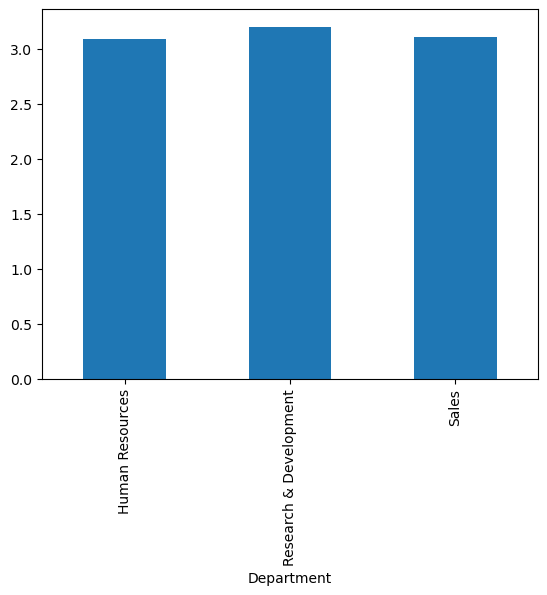

In [33]:
Comb = df1.groupby('Department')['PerformanceRating'].agg('mean')
Comb.plot(kind='bar')

<Axes: xlabel='Department'>

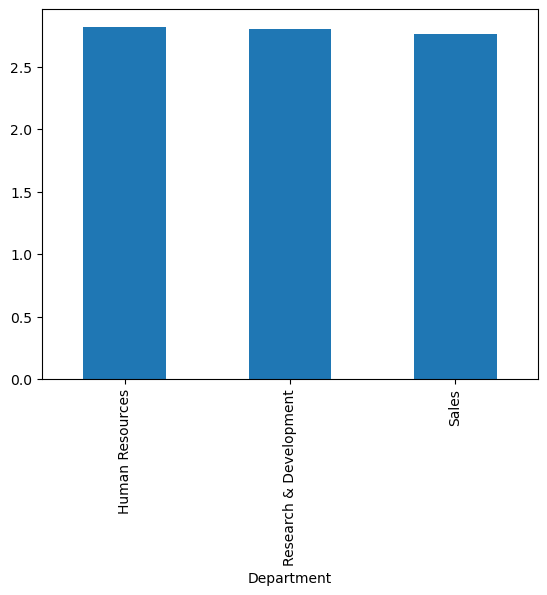

In [34]:
Combo = df1.groupby('Department')['JobSatisfaction'].agg('mean')
Combo.plot(kind='bar')

BusinessTravel
Non-Travel           3.173333
Travel_Frequently    3.166065
Travel_Rarely        3.147651
Name: PerformanceRating, dtype: float64


<Axes: title={'center': 'Grouping Performance Rating by Business Travel'}, xlabel='BusinessTravel'>

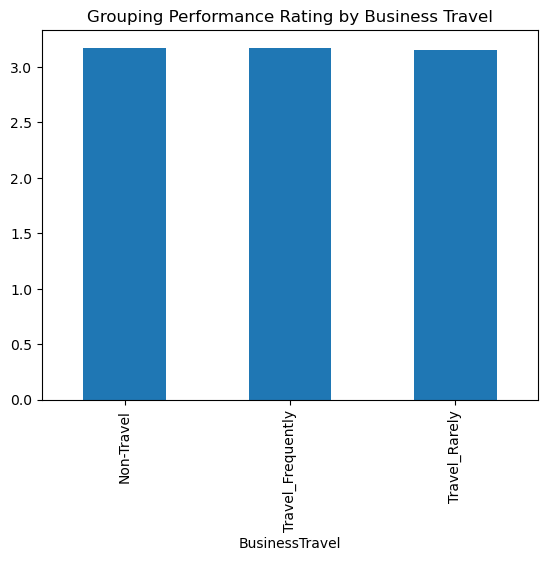

In [21]:
Combo = df.groupby('BusinessTravel')['PerformanceRating'].agg('mean')
print (Combo)
plt.title('Grouping Performance Rating by Business Travel')
Combo.plot(kind='bar')

BusinessTravel
Non-Travel           2.793333
Travel_Frequently    2.790614
Travel_Rarely        2.702780
Name: JobSatisfaction, dtype: float64


<Axes: title={'center': 'Grouping Job Satisfaction by Business Travel'}, xlabel='BusinessTravel'>

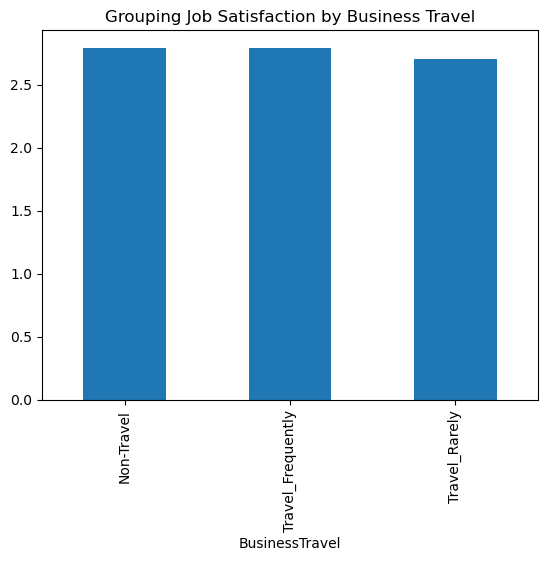

In [22]:
Combo = df.groupby('BusinessTravel')['JobSatisfaction'].agg('mean')
print (Combo)
plt.title('Grouping Job Satisfaction by Business Travel')
Combo.plot(kind='bar')

#### Business Travel Analysis
- After analysis, Job satisfaction is not based on the type of business travel
- Business travel type also doesn't affect performance rating.
- Non-travelling employee had higher average on but job satisfaction and performance rating.

### 2.2 Missing Values Check

In [8]:
# Check missing values
# Check for missing values
print("❓ Missing Values Check:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_values[missing_values > 0])

❓ Missing Values Check:
✅ No missing values found!


##  2.3 Transforming the data
### We have to drop columns like: EmployeeCount, EmployeeNumber, Standard Hours, Over18

In [23]:
df.drop(columns=['EmployeeCount','EmployeeNumber','StandardHours','Over18'], inplace=True)

In [25]:
numerical_cols = df.select_dtypes("number")
numerical_cols

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [26]:
numerical_cols.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [32]:
## Correlation Analysis
num_cols = numerical_cols.columns.tolist()
df[num_cols].corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


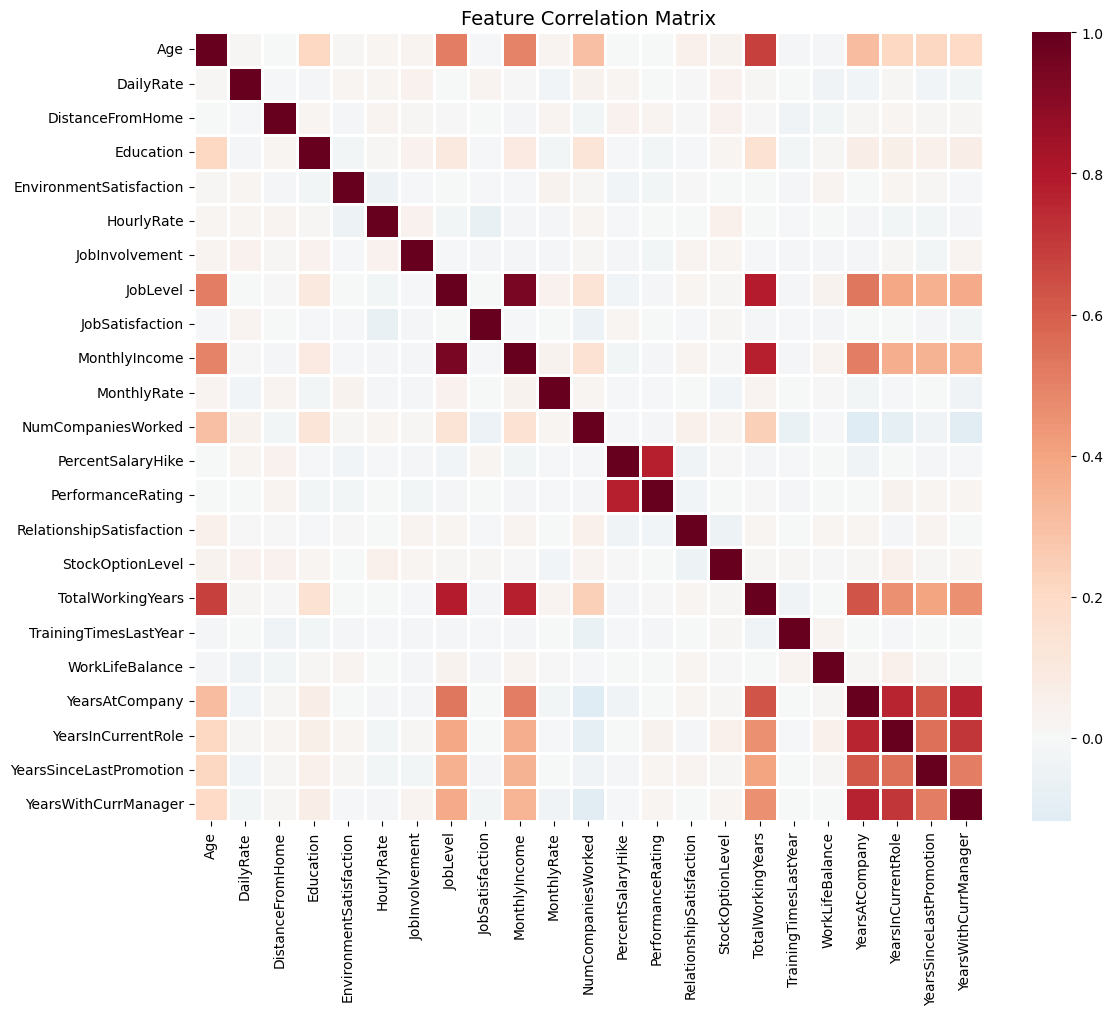

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='RdBu_r', center=0, 
            square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

#### Performance Rating v Training
#### Salary Hike v Job Satisfaction
#### Promotion v Perfomance v Job Satisfaction

### Insight
- No correlation and relationship existing between Performance rating and the number of training in the last year
- There is also no correlation between Salary hike and Job satisfaction
- However, there is a strong 0.77 correlation coefficient between salary Hike percent and Perfomance Rating, which means there is strong linear relationship between salary hike and performance rating. Generally, higher salary hike results to higher performance rating and vice versa.
- 

## Feature Engineering for Age
- 18-25 - Young adults
- 25-59 - Adults
- 60 and above - Older Adults

In [29]:
df1 = df.copy()
df1['age_bin'] = pd.cut(df1['Age'], 
                               bins=[18, 25, 60, 65],
                               labels=['Young Adults','Adults', 'Older Adults'])

df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_bin
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,Adults
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,Adults
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,Adults
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,Adults
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,Adults


In [30]:
df1['age_bin'].value_counts()

age_bin
Adults          1347
Young Adults     115
Older Adults       0
Name: count, dtype: int64

### 2.4 Categorical Features EDA

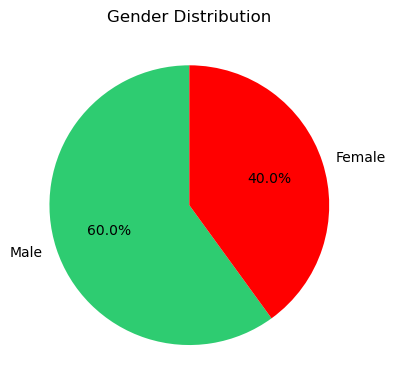

In [46]:
# Gender Distribution
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

Gender_counts = df['Gender'].value_counts()

# Pie chart
colors = ['#2ecc71', '#FF0000']
axes.pie(Gender_counts, labels=['Male','Female'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes.set_title('Gender Distribution')

plt.tight_layout()
plt.show()

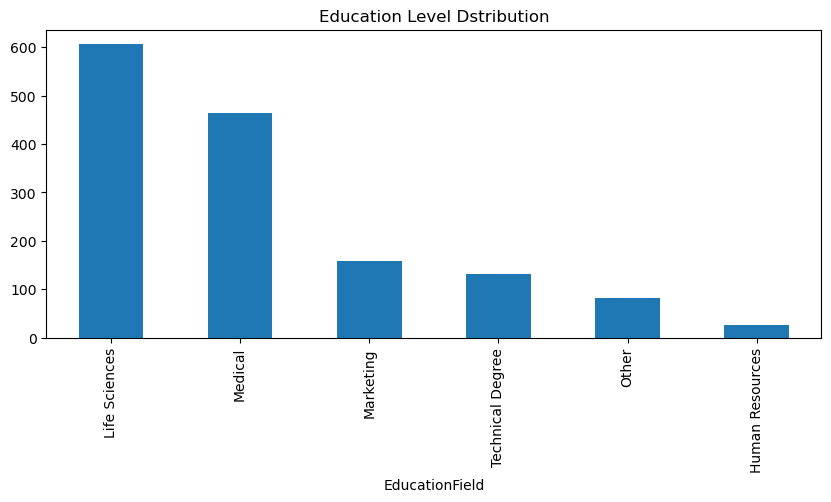

In [47]:
df.value_counts('EducationField').plot(kind='bar',figsize=(10,4))
plt.title('Education Level Dstribution')
plt.show()

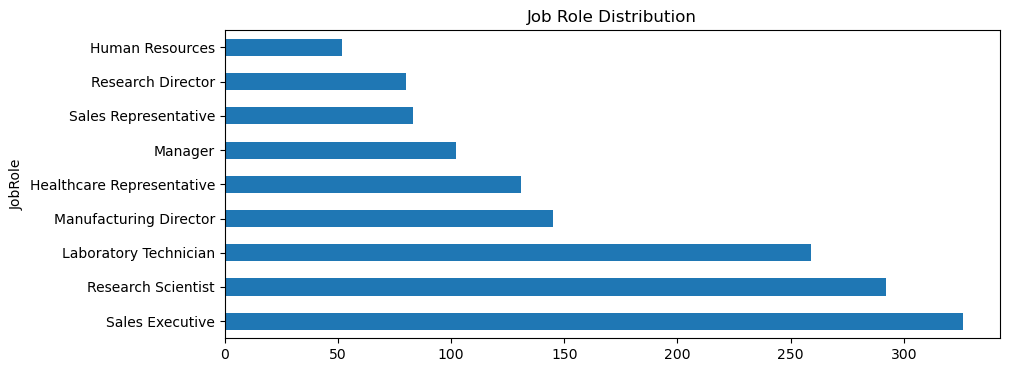

In [48]:
df.value_counts('JobRole').plot(kind='barh',figsize=(10,4))
plt.title('Job Role Distribution')
plt.show()

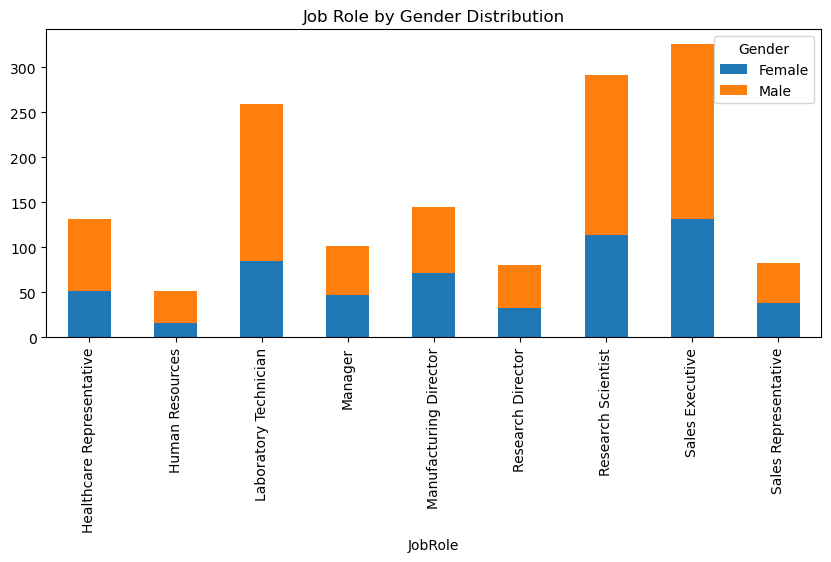

In [ ]:
from itertools import combinations

df.groupby(['JobRole','Gender']).size().unstack().plot(kind='bar', stacked=True,figsize=(10,4))
plt.title('Job Role by Gender Distribution')
plt.savefig('jobrole_gender_distribution.png')
plt.show()

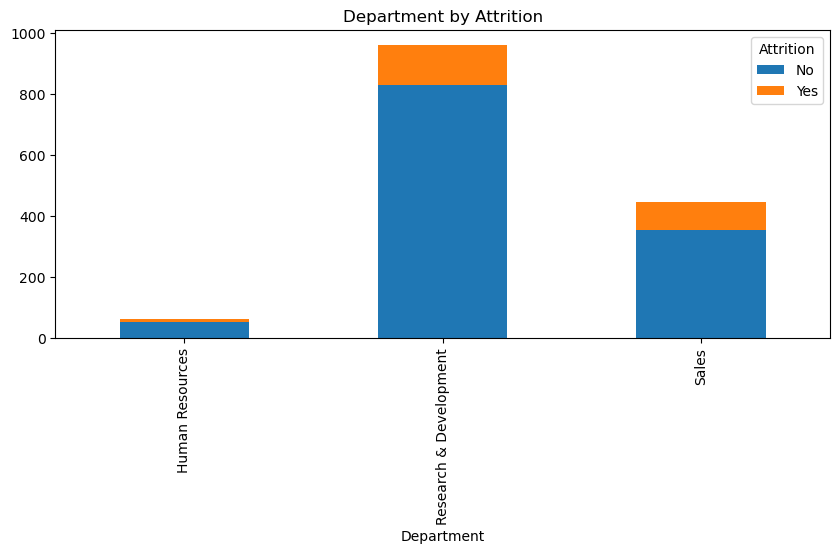

In [ ]:
df.groupby(['Department','Attrition']).size().unstack().plot(kind='bar', stacked=True,figsize=(10,4))
plt.title('Department by Attrition')
plt.savefig('department_attrition.png')
plt.show()